# AutoEncoders on Image Data

## The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

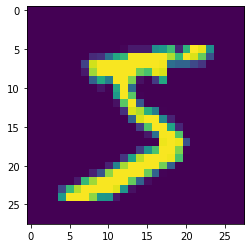

In [4]:
plt.imshow(X_train[0])
plt.show()

In [5]:
X_train.max()

255

In [6]:
X_train = X_train/255
X_test = X_test/255

## Basic AutoEncoder

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [8]:
# pixels
28*28

784

In [9]:
# dividing in half
784/2

392.0

In [10]:
encoder = Sequential()

encoder.add(Flatten(input_shape=[28,28]))

encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))  # 3,18% of the original size (784)

In [11]:
decoder = Sequential()

decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))  # sigmoid - match or not to the original image (0 or 1)

decoder.add(Reshape([28, 28]))

'Sigmoid' as activation function at the last layer and 'binary_crossentropy' as loss fuction, because the autoencoder just care about if the image we're producing as the output going to match the original image.

In [12]:
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=1.5),metrics=['accuracy'])

In [14]:
# X_train, X_train, because is semi supervised, we want to know if the input matches the output
autoencoder.fit(x=X_train, y=X_train, epochs=5, validation_data=(X_test,X_test))

Epoch 1/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2416 - accuracy: 0.0986 - val_loss: 0.1922 - val_accuracy: 0.1538
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1788 - accuracy: 0.1759 - val_loss: 0.1602 - val_accuracy: 0.1936
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1554 - accuracy: 0.2021 - val_loss: 0.1454 - val_accuracy: 0.2108
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1448 - accuracy: 0.2172 - val_loss: 0.1469 - val_accuracy: 0.2045
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1365 - accuracy: 0.2285 - val_loss: 0.1336 - val_accuracy: 0.2337


In [15]:
passed_images = autoencoder.predict(X_test[:10])

Original image:


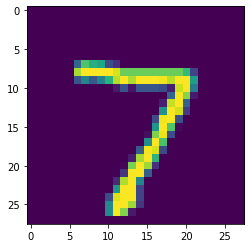

Attemped reconstruction - after autoencoder:


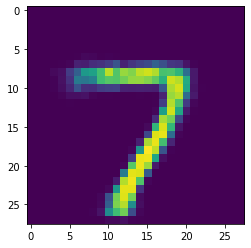

Original image:


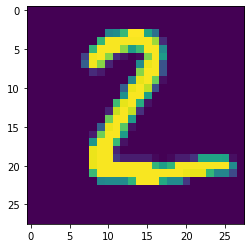

Attemped reconstruction - after autoencoder:


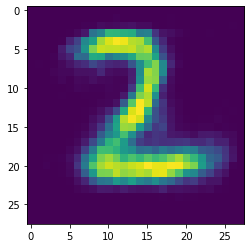

Original image:


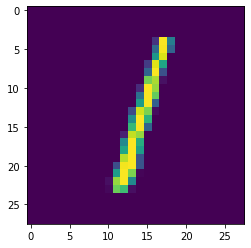

Attemped reconstruction - after autoencoder:


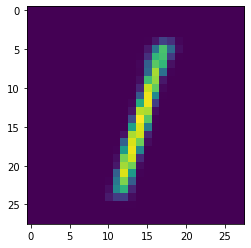

Original image:


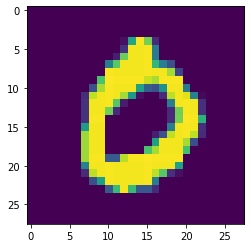

Attemped reconstruction - after autoencoder:


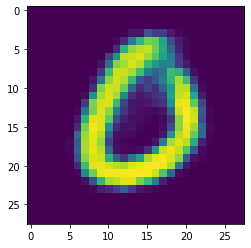

Original image:


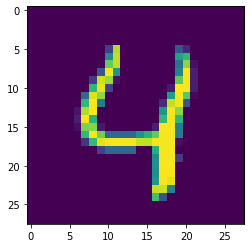

Attemped reconstruction - after autoencoder:


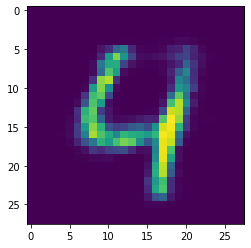

Original image:


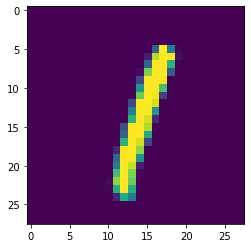

Attemped reconstruction - after autoencoder:


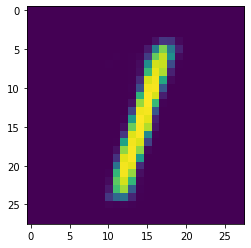

Original image:


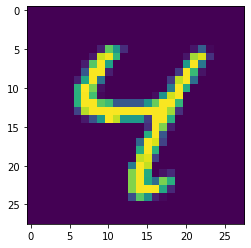

Attemped reconstruction - after autoencoder:


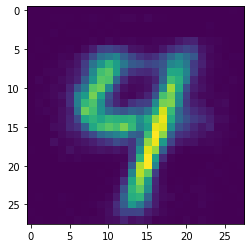

Original image:


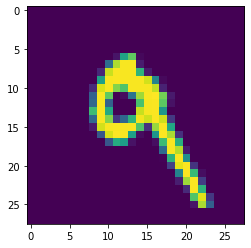

Attemped reconstruction - after autoencoder:


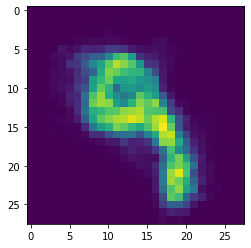

Original image:


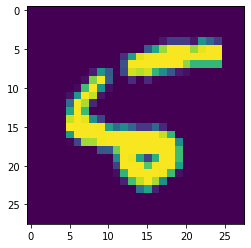

Attemped reconstruction - after autoencoder:


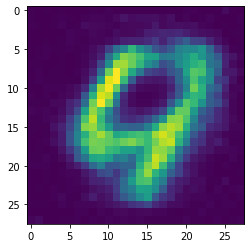

Original image:


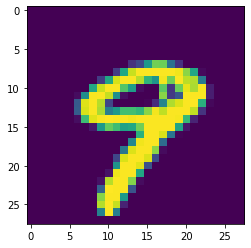

Attemped reconstruction - after autoencoder:


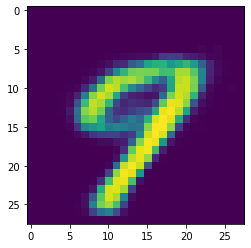

In [18]:
for i in range(10):
  print('Original image:')
  plt.imshow(X_test[i])
  plt.show()
  print('Attemped reconstruction - after autoencoder:')
  plt.imshow(passed_images[i])
  plt.show()


# AutoEncoders for Denoising Images

In [19]:
from tensorflow.keras.layers import GaussianNoise

In [20]:
sample = GaussianNoise(0.2)

In [21]:
noisey = sample(X_test[:10],training=True)

Original image:


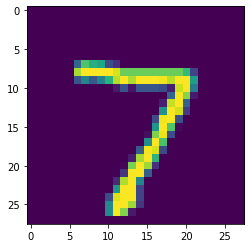

Noise Version


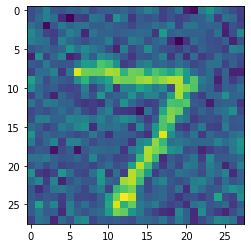

Original image:


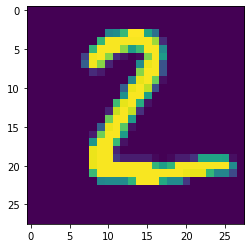

Noise Version


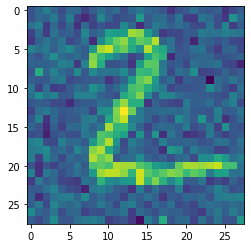

Original image:


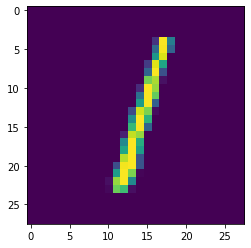

Noise Version


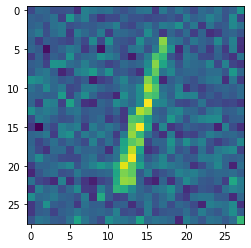

Original image:


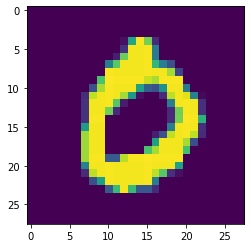

Noise Version


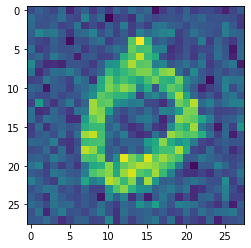

Original image:


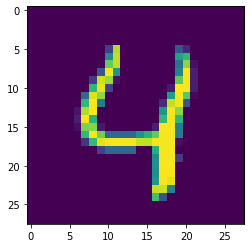

Noise Version


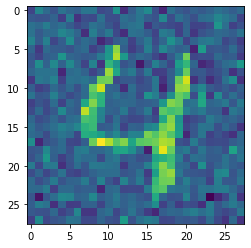

Original image:


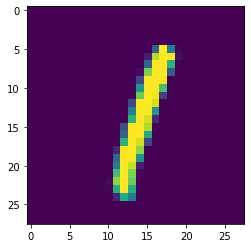

Noise Version


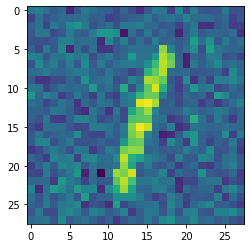

Original image:


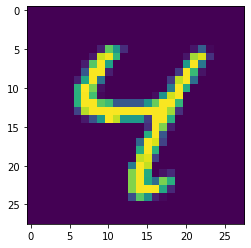

Noise Version


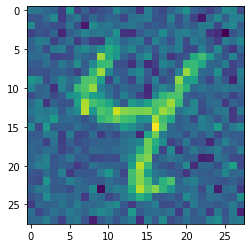

Original image:


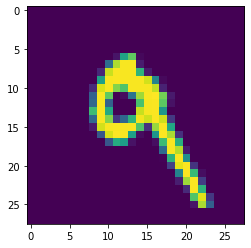

Noise Version


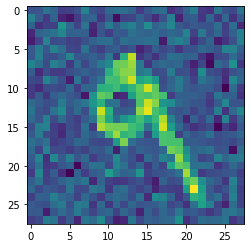

Original image:


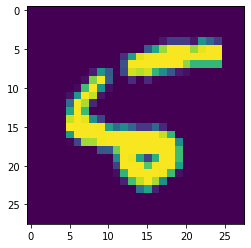

Noise Version


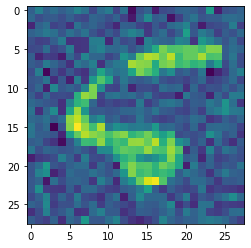

Original image:


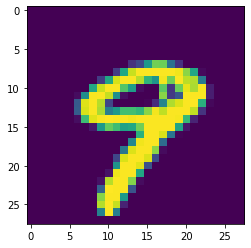

Noise Version


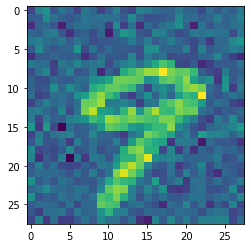

In [22]:
for i in range(10):
  print('Original image:')
  plt.imshow(X_test[i])
  plt.show()
  print('Noise Version')
  plt.imshow(noisey[i])
  plt.show()


### Create  noise removal autoencoder and train it.

In [23]:
import tensorflow as tf

In [24]:
# TO create the exact same noise (optional)
tf.random.set_seed(101)
np.random.seed(101)

# same encoder, just add the noise layer
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [25]:
decoder = Sequential()

decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [26]:
noise_remover = Sequential([encoder, decoder])

In [27]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [28]:
noise_remover.fit(x=X_train,y=X_train, epochs=8,
                           validation_data=(X_test, X_test))

Epoch 1/8
1875/1875 [==============================] - 24s 12ms/step - loss: 0.1699 - accuracy: 0.1822 - val_loss: 0.1352 - val_accuracy: 0.2265
Epoch 2/8
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1282 - accuracy: 0.2335 - val_loss: 0.1209 - val_accuracy: 0.2416
Epoch 3/8
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1206 - accuracy: 0.2454 - val_loss: 0.1144 - val_accuracy: 0.2498
Epoch 4/8
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1167 - accuracy: 0.2526 - val_loss: 0.1119 - val_accuracy: 0.2542
Epoch 5/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1130 - accuracy: 0.2600 - val_loss: 0.1087 - val_accuracy: 0.2581
Epoch 6/8
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1102 - accuracy: 0.2644 - val_loss: 0.1071 - val_accuracy: 0.2675
Epoch 7/8
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1077 - accuracy: 0.2677 - val_loss: 0.1035 - val_ac

In [29]:
ten_noisey_images = sample(X_test[0:10],training=True)

In [30]:
denoised = noise_remover(ten_noisey_images[0:10])

The Original


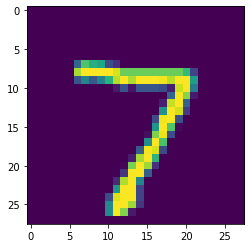

The Noisey Version


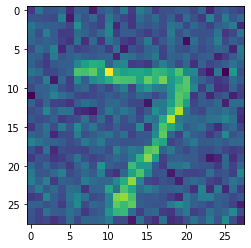

After going through denoiser


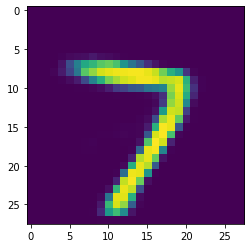

The Original


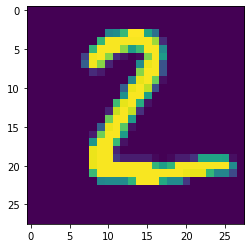

The Noisey Version


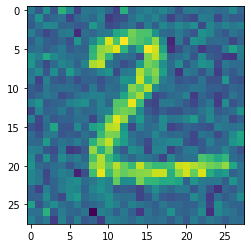

After going through denoiser


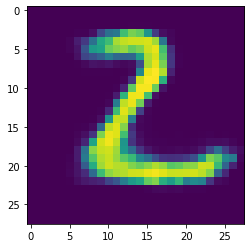

The Original


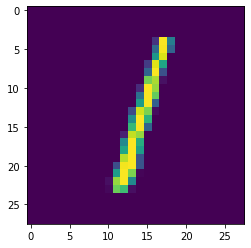

The Noisey Version


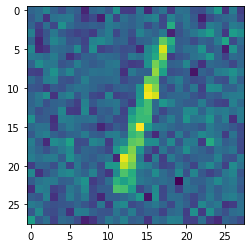

After going through denoiser


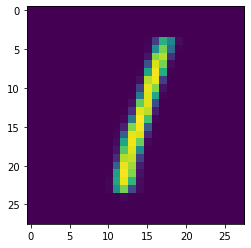

The Original


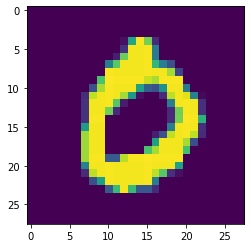

The Noisey Version


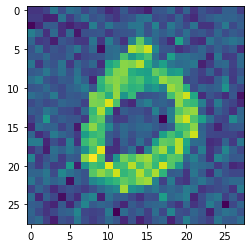

After going through denoiser


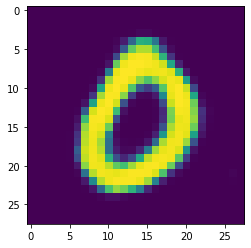

The Original


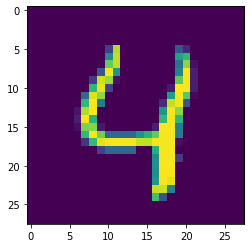

The Noisey Version


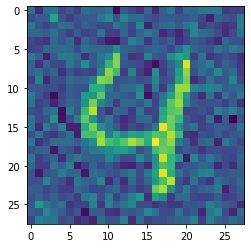

After going through denoiser


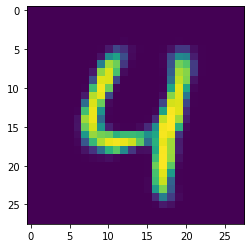

The Original


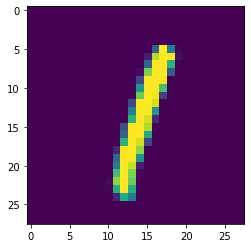

The Noisey Version


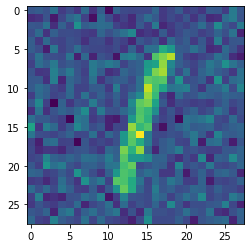

After going through denoiser


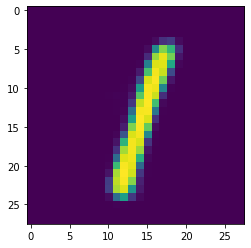

The Original


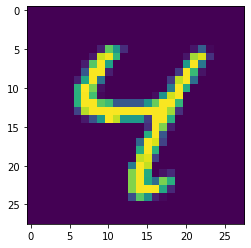

The Noisey Version


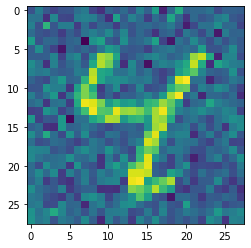

After going through denoiser


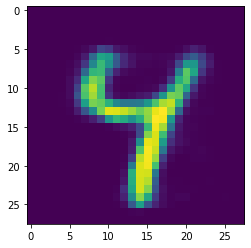

The Original


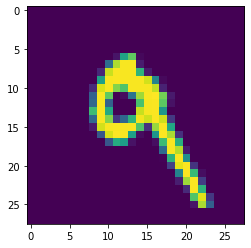

The Noisey Version


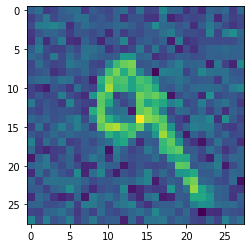

After going through denoiser


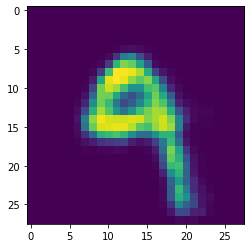

The Original


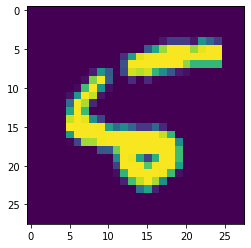

The Noisey Version


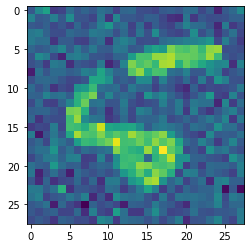

After going through denoiser


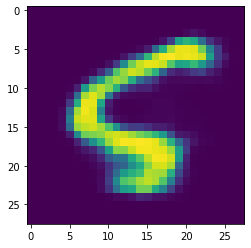

The Original


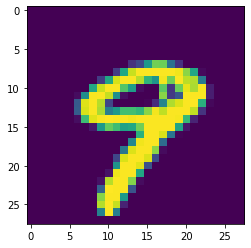

The Noisey Version


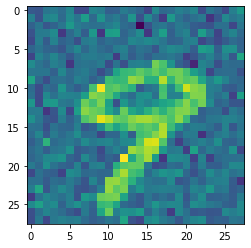

After going through denoiser


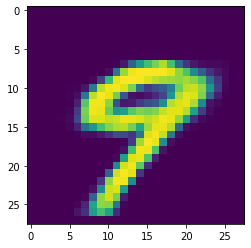

In [31]:
for i in range(10):
  print("The Original")
  plt.imshow(X_test[i])
  plt.show()
  print("The Noisey Version")
  plt.imshow(ten_noisey_images[i])
  plt.show()
  print("After going through denoiser")
  plt.imshow(denoised[i])
  plt.show()

## Saving our models

In [33]:
autoencoder.save('autoencoder_img_model.h5')

In [32]:
noise_remover.save('noise_img_remover.h5')